# Анализ определяющих успешность компьютерных игр закономерностей для интернет-магазина "Стримчик"

Шаги выполнения проекта:

1. Изучение общей информации о данных и их подготовка для анализа.
2. Исследование общих трендов рынка игр в разрезе времени, платформ и жанров.
3. Анализ продаж игр в разных регионах мира (Северная Америка, Европа, Япония) и выявление популярных платформ, жанров и 
    рейтингов ESRB.
4. Описание портретов пользователей каждого региона мира.
5. Проверка гипотез о средних пользовательских рейтингах платформ и жанров.
6. Общие выводы

Для выполнения проекта используются различные методы и инструменты анализа данных, в том числе библиотеки Pandas, NumPy, Matplotlib, Seaborn, SciPy. Проводятся различные статистические тесты и визуализации, чтобы обнаружить связи и закономерности между переменными.


## Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##  Изучим общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')

'Первые строчки:'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


'Последние строчки:'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


'Случайные строчки:'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14841,Steins;Gate 0,PS3,2015.0,Adventure,0.00,0.00,0.03,0.0,NaN,NaN,NaN
14891,Renegade Racers,PS,1999.0,Racing,0.01,0.01,0.00,0.0,NaN,NaN,NaN
16516,Railfan,PS3,2006.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.2,80.0,6.3,T
12873,Minna to Kimi no Piramekino!,DS,2010.0,Misc,0.00,0.00,0.05,0.0,NaN,NaN,NaN


'Информация о каждом столбце:'

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


'Общая информация:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


'Явные дубликаты:'

0

'Сортировка и количество пропущенных значений:'

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

'Гистограмма:'

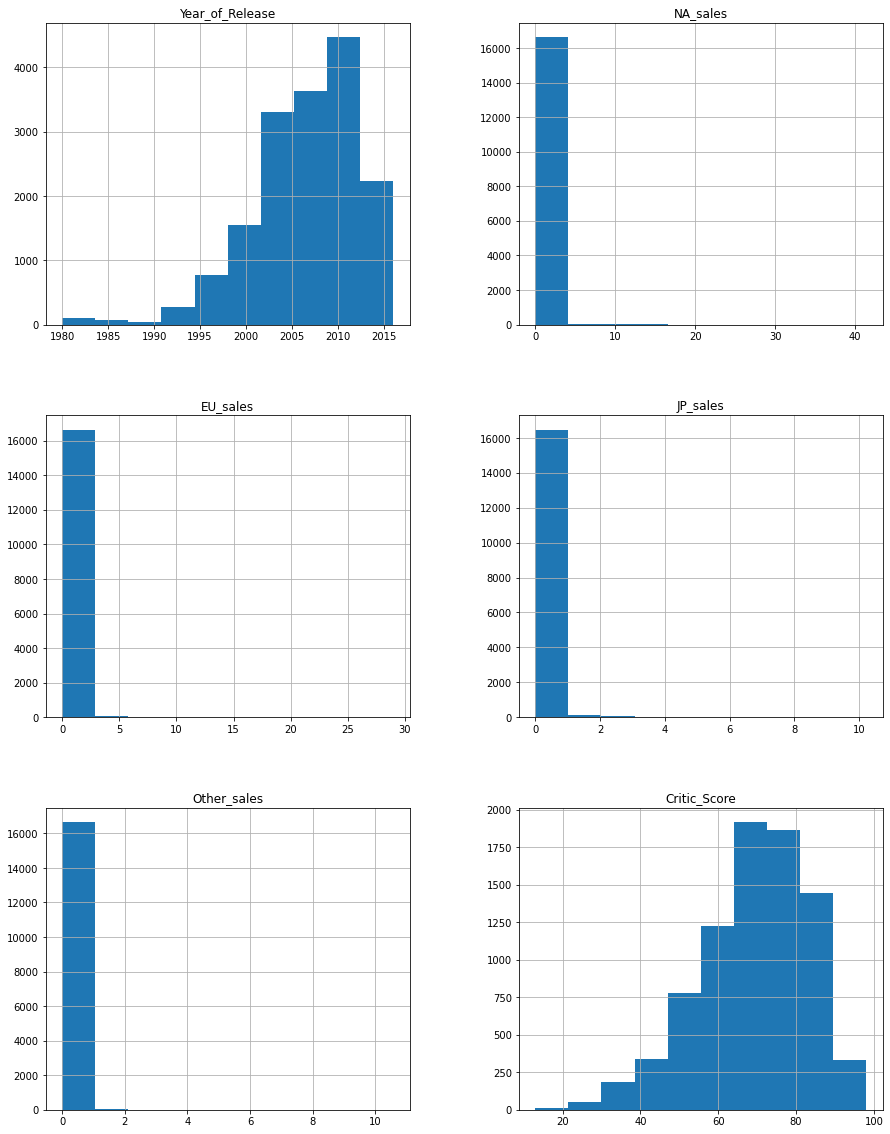

In [3]:
def analyze_dataframe(df):
    display("Первые строчки:", df.head())
    display("Последние строчки:", df.tail())
    display("Случайные строчки:", df.sample(5))
    display("Информация о каждом столбце:", df.describe())
    display("Общая информация:")
    df.info()
    display("Явные дубликаты:", df.duplicated().sum())
    display("Сортировка и количество пропущенных значений:", df.isnull().sum().sort_values())
    display("Гистограмма:")
    df.hist(figsize=(15, 20))
    plt.show()
analyze_dataframe(data)


Выводы:
1. Последовательность столбцов логична
2. Явных дубликатов - нет
3. В некоторых столбцах нужно изменить типы данных, в текстовых - привести к нижнему регистру
4. Существуют пропущенные значения в столбцах, нужно обработать или удалить строчки
5. Для многих игр нет оценок пользователей, критиков, рейтинга - стоит рассмотреть детально

In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

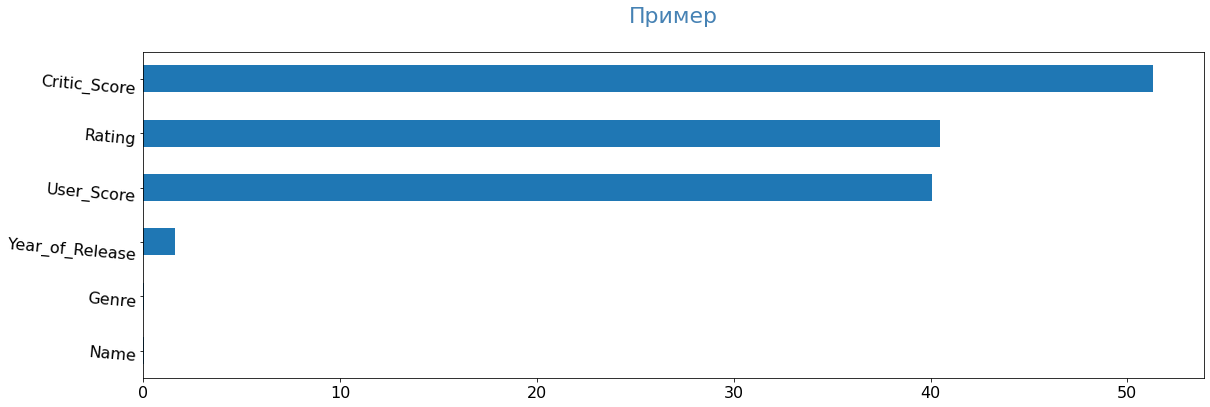

In [5]:
pass_value_barh(data)

### Подгтовка данных

Заменим названия столбцов (приведём к нижнему регистру)

In [6]:
data = data.rename(columns=lambda x: x.lower())

Преобразуем данные в нужные типы
1. year_of_release: изменю тип данных на Int64, так как год релиза должен быть целым числом.
2. user_score: изменю тип данных на Float64, так как оценки пользователей представлены на шкале от 0 до 10 и должны быть 
    числами с плавающей точкой.

Преобразование столбца year_of_release - не вызывает проблем - преобразуем
Преобразование типа данных в столбце user_score - затруднительный процесс, для начала нужно придумать, что сделать со значениями tdb

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Tbd -  To Be Determined, то есть "Будет определено" Для анализа такие данные не очень подходят, заменим на nan

In [8]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Займёмся проверкой пропущенных значений
Посмотрю что за пропуски в столбце name

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Очень странные строчки - удалим

In [11]:
data = data.dropna(subset=['name'])

В столбце year_of_release - 269 пропусков это около 1.6% заполнить данные можно, но очень трудоёмко - удалим

In [12]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Особых высоких значения нет, максимальное около 5млн - что не так много - спокойно удаляем

In [13]:
data = data.dropna(subset=['year_of_release'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Заполнять пропущенные данные в user_score, critic_score, rating приблизительными данными достаточно сложно, можно заменить отрицательными числами, но особого смысла в этом нет, тк формат столбца численный и при использовании методов проблем быть не должно.

Посчитаем суммарные продажи во всех регионах и записать их в отдельный столбец.

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Теперь данные выглядят хорошо

In [17]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

'RP' - «Rating Pending» («Рейтинг ожидается»)

'K-A' на 'E' (данный рейтинг был заменен на 'E' в 1998 году)

Заменим пропущенные значения на RP

In [19]:
data['rating'] = data['rating'].fillna(value='RP')
data['rating'] = data['rating'].replace('K-A', 'E')

In [20]:
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

## Исследовательский анализ данных

Посчитаем сколько игр выпускалось в разные годы и проверим важны ли данные за все периоды

In [21]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


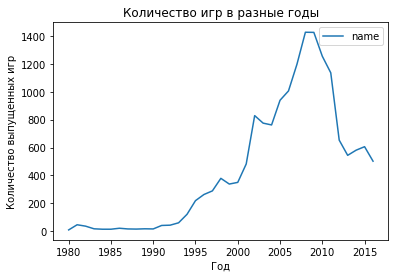

In [22]:
games_per_year.plot();
plt.title('Количество игр в разные годы');
plt.xlabel('Год');
plt.ylabel('Количество выпущенных игр');

До 1994 года количество выпущенных игр не превышало 100 игр/год и была примерно на одном уровне, данные совсем не актуальны. Начиная с 1994 года начинается рост игровой идустрии и достигает пика в 2008-2009 годах с количеством выпущенных за год играми равным - 1400. Думаю это связанно с улучшением технологий, появлению портативных и дешёвых игровых устрйоств.

Удалим строчки до 1994 года - как неактуальные

In [23]:
data_platform = data.loc[data['year_of_release'] >= 1994]
data = data.loc[data['year_of_release'] >= 2014]

In [24]:
platform_sales_a = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', 
                                                                                                     ascending=False)
platform_sales_a['first_year'] = data_platform.groupby('platform')['year_of_release'].min()
platform_sales_a['last_year'] = data_platform.groupby('platform')['year_of_release'].max()
platform_sales_a['lifespan'] = platform_sales_a['last_year'] - platform_sales_a['first_year']
platform_sales_a['lifespan'].mean()

8.4

Средник срок жизни платформ около 6-8 лет

In [25]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', 
                                                                                                     ascending=False)
platform_sales['first_year'] = data.groupby('platform')['year_of_release'].min()
platform_sales['last_year'] = data.groupby('platform')['year_of_release'].max()
platform_sales['lifespan'] = platform_sales['last_year'] - platform_sales['first_year']
platform_sales['num_of_games'] = data.groupby('platform')['name'].count()
platform_sales = platform_sales.reset_index()

In [26]:
platform_sales.sort_values('lifespan', ascending=False)

,platform,total_sales,first_year,last_year,lifespan,num_of_games
0,PS4,288.15,2014,2016,2,376
1,XOne,140.36,2014,2016,2,228
2,3DS,86.68,2014,2016,2,212
3,PS3,68.18,2014,2016,2,219
4,X360,48.22,2014,2016,2,111
5,WiiU,42.98,2014,2016,2,73
6,PC,27.05,2014,2016,2,151
7,PSV,22.40,2014,2016,2,295
8,Wii,5.07,2014,2016,2,11
9,PSP,0.36,2014,2015,1,13


Из данной таблицы можно сделать следующие выводы:
1. Для будущих исследований данные о платформах, которые исчезли до 2016 не нужны, будем исследовать лишь те платформы, которые актуальны для 2016 года
2. Мы можем посмотреть среднее время жизни платформ
3. Существует 5 платформ - однодневок, которые не прожили и года на рынке: GEN, SCD, TG16, NES, PCFX
4. PC - существует очень долго даже с ограничением в 1994 года, PC существует 22 года - т.е. всё время

Время жизни лучше исследовать начиная с 1994 года

Около 6 лет, действительно большая часть актуальных платформ появилось в 2016 году, есть и платформы, которые которые актуальны и сейчас, но появились за 7 лет и более до 2016 - такие платформы постепенно теряют спрос скорей всего, проверю догатку графиком

In [27]:
platform_sales = platform_sales.query('last_year == 2016')

In [28]:
platform_sales

,platform,total_sales,first_year,last_year,lifespan,num_of_games
0,PS4,288.15,2014,2016,2,376
1,XOne,140.36,2014,2016,2,228
2,3DS,86.68,2014,2016,2,212
3,PS3,68.18,2014,2016,2,219
4,X360,48.22,2014,2016,2,111
5,WiiU,42.98,2014,2016,2,73
6,PC,27.05,2014,2016,2,151
7,PSV,22.40,2014,2016,2,295
8,Wii,5.07,2014,2016,2,11


In [29]:
actual_platforms = ['X360', 'PS3', 'Wii', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV']
data_actual = data.query('platform in @actual_platforms').reset_index(drop=True)

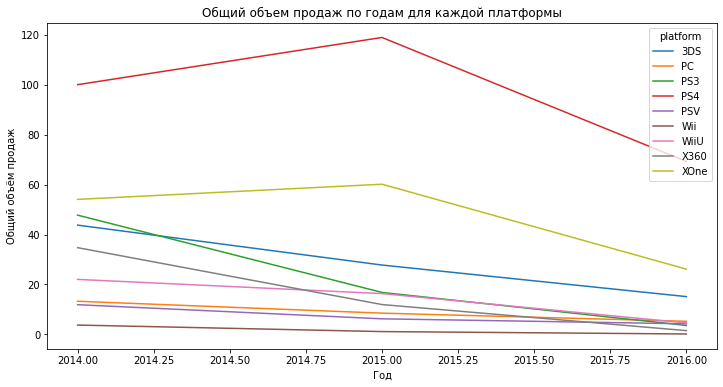

In [30]:
sales_by_year = data_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

# Строим график
sales_by_year.plot(kind='line', figsize=(12,6))

# Называем оси и график
plt.xlabel('Год')
plt.ylabel('Общий объём продаж')
plt.title('Общий объем продаж по годам для каждой платформы')
plt.show()

Догадка подтвердилась, платформы появившиеся до 2010 уже достигли своего пика, но также актуальны в 2016, поэтому используем их для дальнейшего анализа

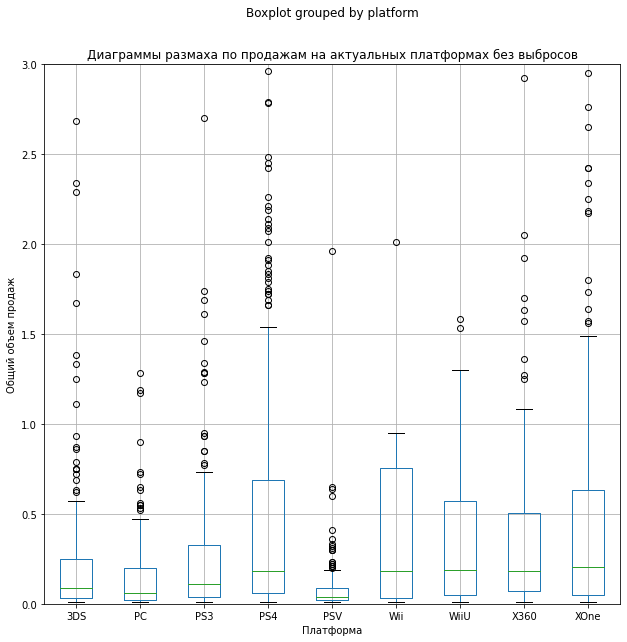

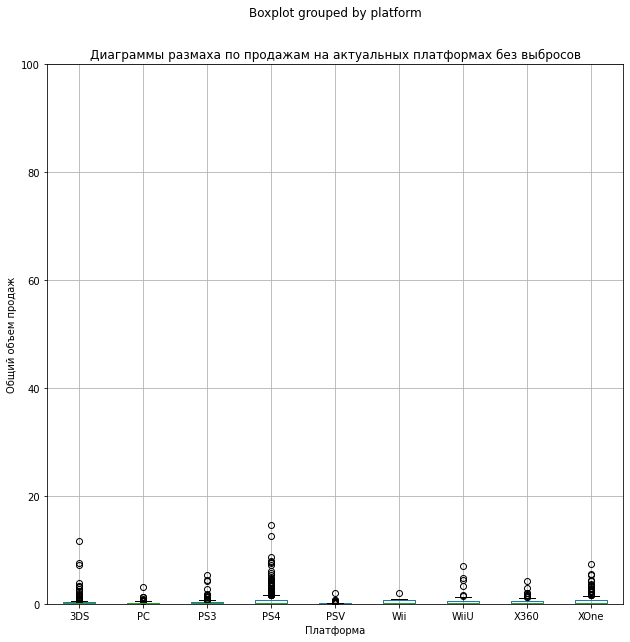

In [31]:
data_actual.query('platform in @actual_platforms')[['platform', 'name', 'total_sales']].boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Общий объем продаж')
plt.title('Диаграммы размаха по продажам на актуальных платформах без выбросов')
plt.ylim(0, 3);
data_actual.query('platform in @actual_platforms')[['platform', 'name', 'total_sales']].boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Общий объем продаж')
plt.title('Диаграммы размаха по продажам на актуальных платформах без выбросов')
plt.ylim(0, 100);

Из диаграммы размаха можно сделать следующие выводы:
1. Самая неуспешная платформа по продажам - PSV. Продажи на ней не только невысока, но также снижается с годами.
2. Успешными можно считать - PS4, XOne, 3DS игры на данные платформы буду популярны и в 2017 году
3. X360 и PS3 уже исполнилось 11 лет и они с малой вероятностью станут перспективными в 2017 году
4. Также стоит отметить PC, прибыль с которого невелика, но постоянно уже долгий промежуток времени
5. Большинство платформ имеют много выбросов, т.е. игры, которые продавались в гораздо большем количестве, чем большинство остальных игр на этой платформе.
6. У многих платформ есть большие выборсы, это связанно с существованием игр-хитов

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Посчитаем корреляцию и построим диаграмму рассеяния сначала для отзывов пользователей, затем для критиков

In [32]:
ps4_sales = data_actual[data_actual['platform'] == 'PS4'][['name', 'user_score', 'critic_score', 'total_sales']]

-0.040131589472697356

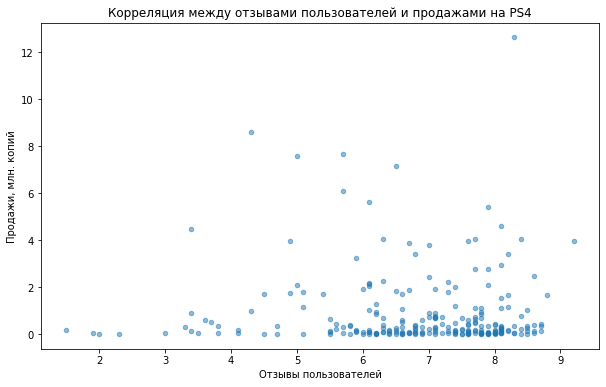

In [33]:
corr = ps4_sales['user_score'].corr(ps4_sales['total_sales'])
display(corr)
ps4_sales.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.5, figsize=(10,6))
plt.title('Корреляция между отзывами пользователей и продажами на PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи, млн. копий')
plt.show()

0.40266141068104083

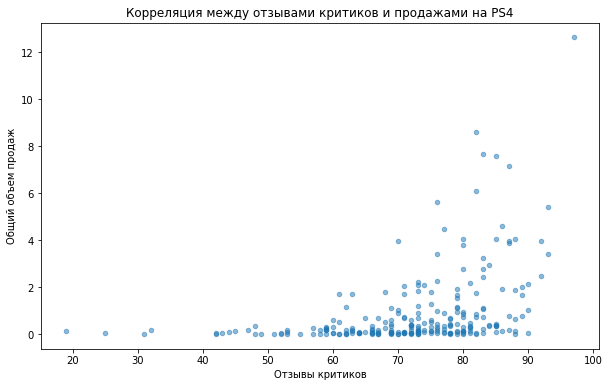

In [34]:
corr1 = ps4_sales['critic_score'].corr(ps4_sales['total_sales'])
display(corr1)
ps4_sales.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.5, figsize=(10,6))
plt.title('Корреляция между отзывами критиков и продажами на PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общий объем продаж')
plt.show()

Выводы:
1. Отзывы пользователей почти не влияют на продажи, это заметно из графика - для игр, продажи которых невелики пользователи могут ставить много положительных оценок, также это подтвержадется корреляцией - "-0.03" что говорит об отсутвии зависимости отзыва пользователя и объёма продаж.
2. Отзывы критиков сильно влияют на продажи, это заметно из графика - чем больше оценка критика, тем больше объём продаж, также это подтверждается корреляцией - 0.4  


Можно сделать вывод о том, что пользователи очень доверют оценкам критиков, и не доверят оценкам пользователей.
Это связанно с тем, что оценки пользователей можно "накрутить", а оценки критиков авторитетны и объективны.

Проверим свои выводы, проанализировав зависимость для остальных платформ

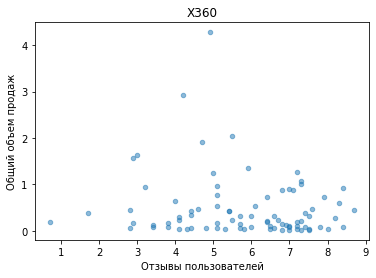

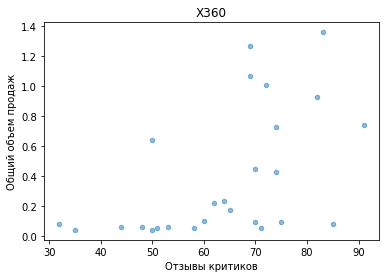

'Корреляция между отзывами пользователей и продажами'

-0.13844457094566498

'Корреляция между отзывами пользователей и продажами'

0.5257228356581523

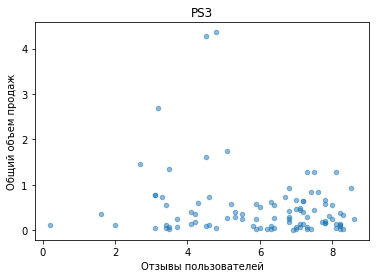

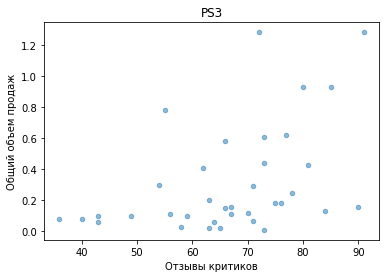

'Корреляция между отзывами пользователей и продажами'

-0.16676141347662118

'Корреляция между отзывами пользователей и продажами'

0.44657460493190787

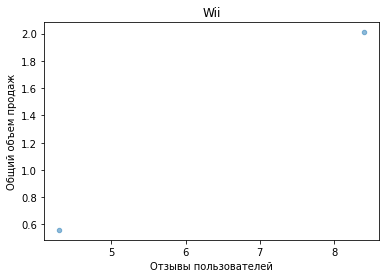

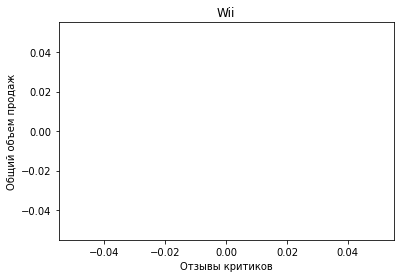

'Корреляция между отзывами пользователей и продажами'

1.0

'Корреляция между отзывами пользователей и продажами'

nan

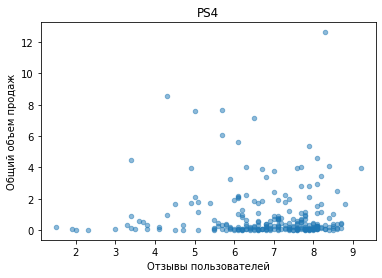

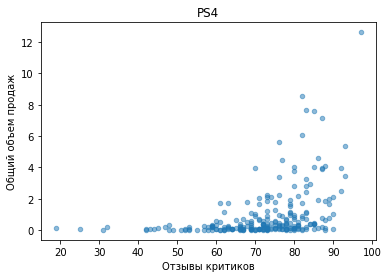

'Корреляция между отзывами пользователей и продажами'

-0.04013158947269716

'Корреляция между отзывами пользователей и продажами'

0.40266141068104144

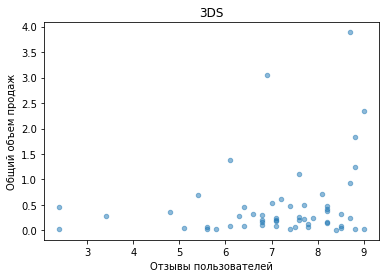

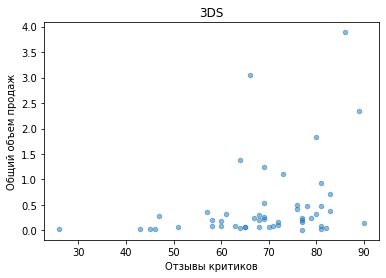

'Корреляция между отзывами пользователей и продажами'

0.21519327185270265

'Корреляция между отзывами пользователей и продажами'

0.31411749286905155

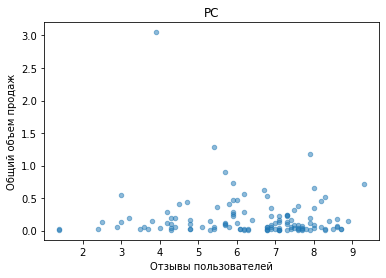

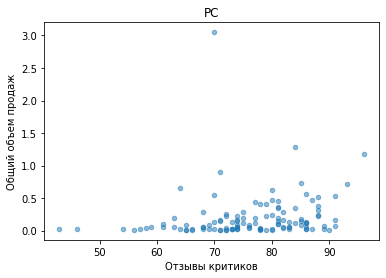

'Корреляция между отзывами пользователей и продажами'

-0.07159665703472443

'Корреляция между отзывами пользователей и продажами'

0.1746341376935012

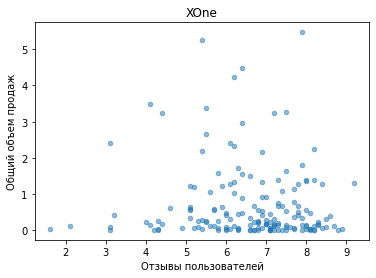

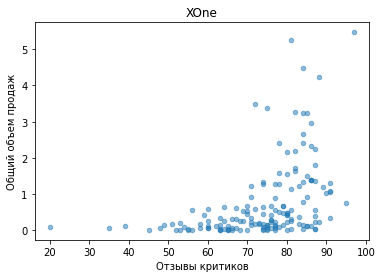

'Корреляция между отзывами пользователей и продажами'

-0.07038392806475892

'Корреляция между отзывами пользователей и продажами'

0.42867694370333287

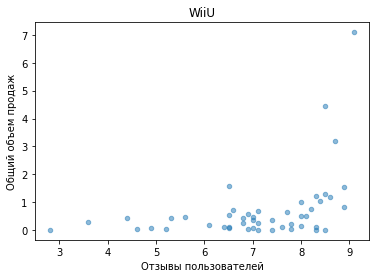

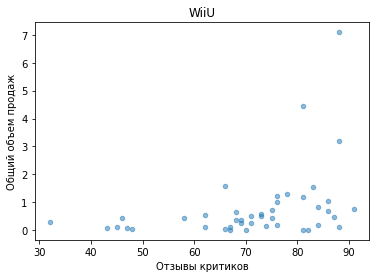

'Корреляция между отзывами пользователей и продажами'

0.4079264579217078

'Корреляция между отзывами пользователей и продажами'

0.3702014124808842

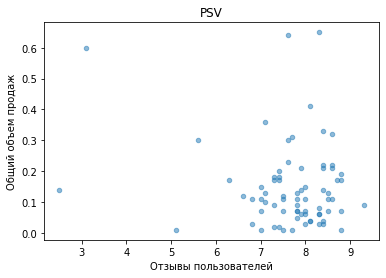

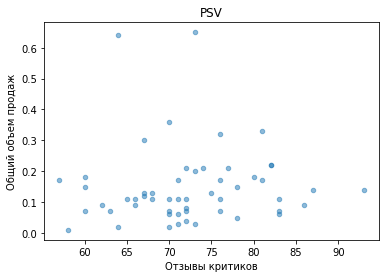

'Корреляция между отзывами пользователей и продажами'

-0.16845504978064538

'Корреляция между отзывами пользователей и продажами'

0.042664906570096375

In [35]:
for platform in actual_platforms:
    df = data_actual[data_actual['platform'] == platform]
    df.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.5)
    plt.title(platform)
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Общий объем продаж')
    plt.show()
    
    df.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.5)
    plt.title(platform)
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Общий объем продаж')
    plt.show()
        
    corr = df[['user_score', 'total_sales']].corr()['total_sales']['user_score']
    corr1 = df[['critic_score', 'total_sales']].corr()['total_sales']['critic_score']
    display('Корреляция между отзывами пользователей и продажами',corr)
    display('Корреляция между отзывами пользователей и продажами',corr1)


Вывод:
Выводы подтвердились но не полностью
1. Для платформы WiiU пользователи отдают предпочтение отзывам пользователей
2. Для платформ: Wii, 3DS, X360, PS3 пользователи больше прислушиваются к отзывам критиков, но и отзывы пользователей также влияют на объём продаж
3. Для PC,PSV, XOne - выводы соответствуют выводам о PS4

Посмотрим на общее распределение игр по жанрам

Action          613
Role-Playing    221
Adventure       181
Sports          160
Shooter         128
Misc            111
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

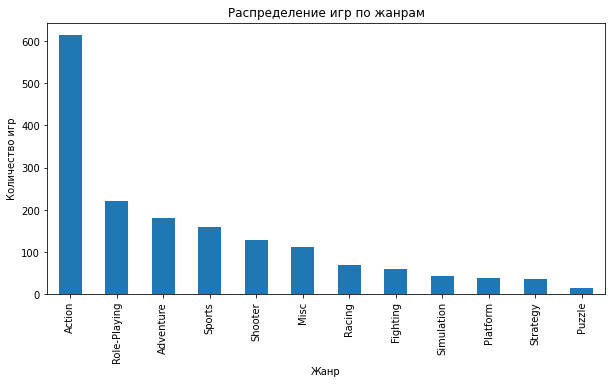

In [36]:
genre_counts = data_actual['genre'].value_counts()
display(genre_counts)
genre_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.title('Распределение игр по жанрам')
plt.show()


genre
Action          199.16
Shooter         170.94
Sports          109.39
Role-Playing    101.44
Misc             37.53
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.50
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

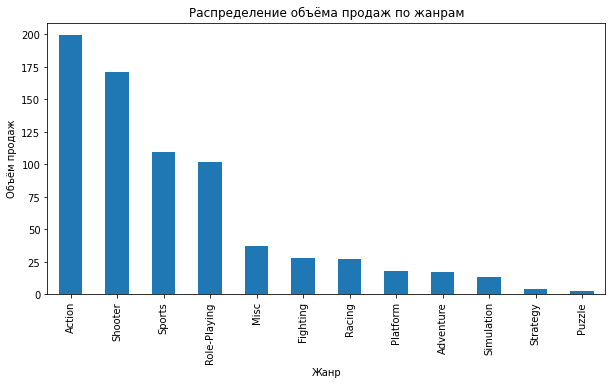

In [37]:
genre_sales = data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
display(genre_sales)
genre_sales.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Жанр')
plt.ylabel('Объём продаж')
plt.title('Распределение объёма продаж по жанрам')
plt.show()


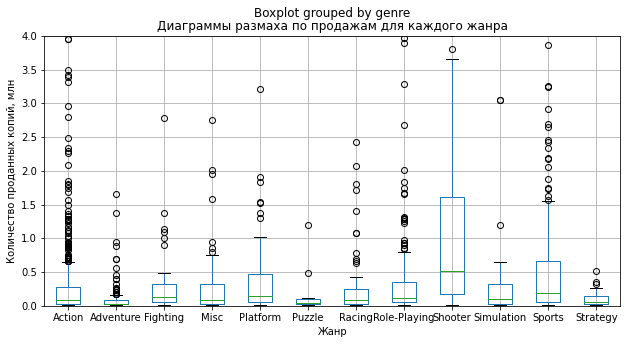

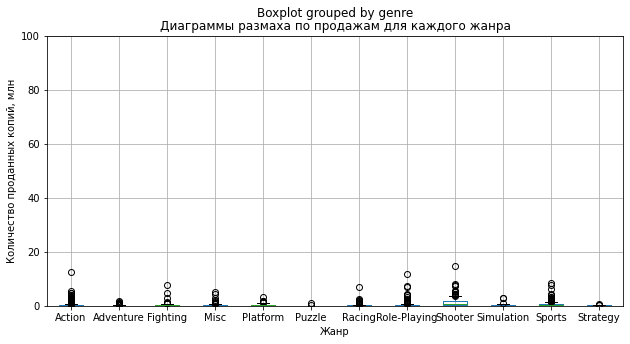

In [38]:
data_actual.boxplot(column='total_sales', by='genre', figsize=(10, 5))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам для каждого жанра')
plt.ylim(0, 4)
plt.show()
data_actual.boxplot(column='total_sales', by='genre', figsize=(10, 5))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам для каждого жанра')
plt.ylim(0, 100)
plt.show()

In [39]:
genre_sales = data_actual.pivot_table(index='genre', values=['total_sales', 'name'], aggfunc={'total_sales': 'sum', 'name': 'count'})
genre_sales.corr()


,name,total_sales
name,1.000000,0.778033
total_sales,0.778033,1.000000


На основании полученных данных можно сделать следующие выводы:

1. Самыми популярными жанрами являются Action, Sports, Misc, Shooter, Role-Playing, а в следствии и самымими прибыльными жанрами
2. Хоть и общий объём продаж высок, для каждого жанра, но в среднем медиана продаж находится в районе 0.2 млн  
3. У жанров: Action, Misc, Platform, Racing-Role, Sports - есть ярко выраженные выбросы - игры-хиты
4. Прибыльные жанры:
    1. Action       c   899.30 млн продаж и количеством игр - 613
    2. Shooter      c   697.48 млн продаж и количеством игр - 128
    3. Sports       c   664.15 млн продаж и количеством игр - 160
    4. Misc         c   398.45 млн продаж и количеством игр - 111
    5. Role-Playing c   344.78 млн продаж и количеством игр - 221
    6. Racing       c   246.53 млн продаж и количеством игр - 69
5. Из чего можно сделать выводы, что количество игр - не всегда значит, что жанр прибыльный, корреляция - 0.892126
6. Ярко выраженные неприбыльные жанры:
    1. Simulation   с    13.13 млн продаж и количеством игр - 44
    2. Strategy     с    3.96 млн продаж и количеством игр - 37
    3. Puzzle       с    2.21 млн продаж и количеством игр - 14

## Портрет пользователя каждого региона

Функция для анализа продаж по регионам
    
    Параметры:
    - region_col: название столбца с регионом ('na_sales', 'eu_sales', 'jp_sales')
    - df: датафрейм с данными
    
    Результат:
    - выводит сводную таблицу с основными метриками продаж по платформам и жанрам, а также графики

In [40]:
def region_profiles(df, region):
    # Определение самых популярных платформ
    top_platforms = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    other_sales = df[~df['platform'].isin(top_platforms.index)][region].sum()
    top_platforms['Other'] = other_sales
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Top 5 platforms in {region}')
    plt.subplot(131)
    plt.pie(top_platforms, labels=top_platforms.index, autopct='%1.1f%%')
    plt.subplot(132)
    sns.barplot(x=top_platforms.index, y=top_platforms.values)
    plt.xticks(rotation=45)
    plt.subplot(133)
    sns.boxplot(x='platform', y=region, data=df[df['platform'].isin(top_platforms.index)])
    plt.ylim(0, df[region].max())
    plt.xticks(rotation=45)
    plt.subplots_adjust(wspace=0.5)

    # Определение самых популярных жанров
    top_genres = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    other_sales = df[~df['genre'].isin(top_genres.index)][region].sum()
    top_genres['Other'] = other_sales
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Top 5 genres in {region}')
    plt.subplot(121)
    plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%')
    plt.subplot(122)
    sns.barplot(x=top_genres.index, y=top_genres.values)
    plt.xticks(rotation=45)
    plt.subplots_adjust(wspace=0.5)

    # Влияние рейтинга ESRB на продажи
    esrb_sales = df.groupby('rating')[region].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Sales by ESRB rating in {region}')
    plt.subplot(121)
    plt.pie(esrb_sales, labels=esrb_sales.index, autopct='%1.1f%%')
    plt.subplot(122)
    sns.barplot(x=esrb_sales.index, y=esrb_sales.values)
    plt.xticks(rotation=45)
    plt.subplots_adjust(wspace=0.5)

    plt.show()

<AxesSubplot:title={'center':'JP Продажи по рейтингу ESRB'}, xlabel='rating'>

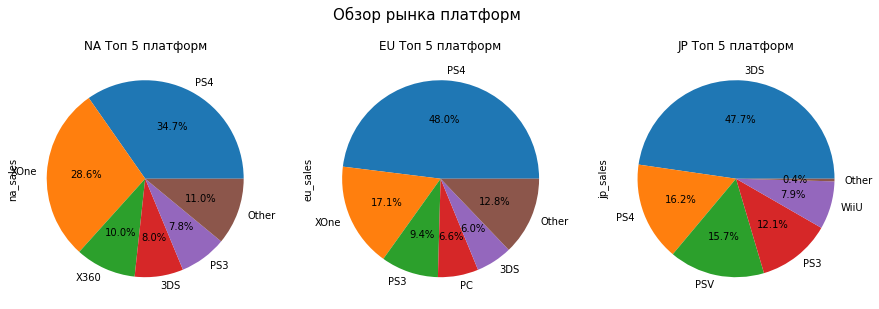

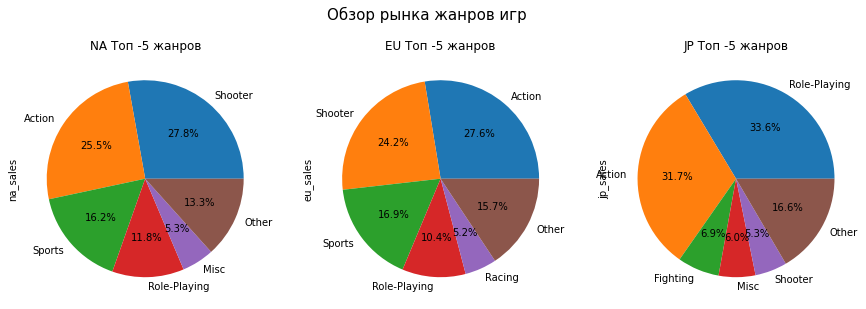

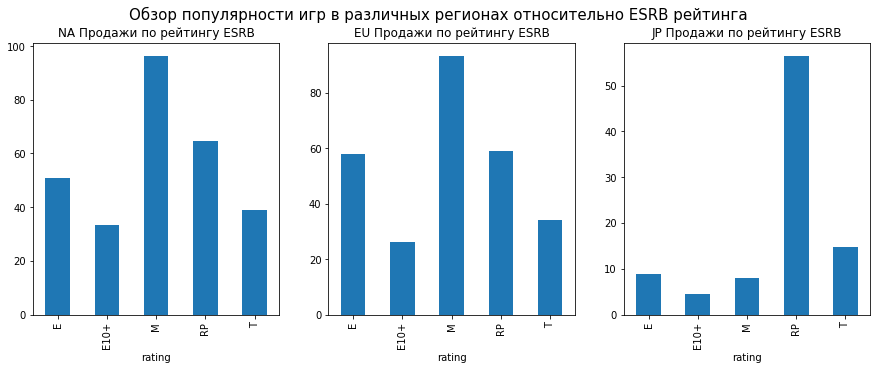

In [41]:
na_platforms = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

#подсчёт other
other_platforms_jp = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).iloc[5:]
total_other_jp_sales = other_platforms_jp.sum()
other_platforms_na = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).iloc[5:]
total_other_na_sales = other_platforms_na.sum()
other_platforms_eu = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).iloc[5:]
total_other_eu_sales = other_platforms_eu.sum()
na_platforms['Other'] = total_other_na_sales
eu_platforms['Other'] = total_other_eu_sales
jp_platforms['Other'] = total_other_jp_sales

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Обзор рынка платформ", fontsize = 15)
na_platforms.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', title='NA Топ 5 платформ')
eu_platforms.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title='EU Топ 5 платформ')
jp_platforms.plot(kind='pie', ax=axes[2], autopct='%1.1f%%', title='JP Топ 5 платформ')


na_genres = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

#подсчёт other
other_jp = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).iloc[5:]
total_other_jp = other_jp.sum()
other_na = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).iloc[5:]
total_other_na = other_na.sum()
other_eu = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).iloc[5:]
total_other_eu = other_eu.sum()
na_genres['Other'] = total_other_na
eu_genres['Other'] = total_other_eu
jp_genres['Other'] = total_other_jp


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Обзор рынка жанров игр", fontsize = 15)
na_genres.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', title='NA Топ -5 жанров')
eu_genres.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title='EU Топ -5 жанров')
jp_genres.plot(kind='pie', ax=axes[2], autopct='%1.1f%%', title='JP Топ -5 жанров')


na_esrb = data_actual.groupby('rating')['na_sales'].sum()
eu_esrb = data_actual.groupby('rating')['eu_sales'].sum()
jp_esrb = data_actual.groupby('rating')['jp_sales'].sum()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Обзор популярности игр в различных регионах относительно ESRB рейтинга", fontsize = 15)
na_esrb.plot(kind='bar', ax=axes[0], title='NA Продажи по рейтингу ESRB')
eu_esrb.plot(kind='bar', ax=axes[1], title='EU Продажи по рейтингу ESRB')
jp_esrb.plot(kind='bar', ax=axes[2], title='JP Продажи по рейтингу ESRB')


Исходя из полученных результатов, можно сделать следующие выводы:
1. В NA и EU популярность новых платформ (PS4 и XOne) выше, чем в JP.
2. Для JP самая популярная платформа - 3DS, с большим отрывом относительно новых платформ
3. Жанр Action является самым популярным в NA и EU, в то время как в JP на первом месте - Role-Playing.
4. В NA и EU влияние рейтинга ESRB на продажи более заметно, чем в JP, где преобладают игры без рейтинга

Портреты пользователей:


1. NA
    
    Самые популярные платформы: PS4 - 34.7%, XOne - 28.6%, X360 - 10.0%, 3DS - 8.0%, PS3 - 7,8% Other - 11.0%
    
    Самые популярные жанры: Shooter - 27.8%, Action - 25.5%, Sports - 16.2%, Role-Playing - 11.8%, Misc - 5.3%. Other - 13.3%
    
    Самый популярный рейтинг ESRB: M (для взрослых).

2. EU
    
    Самые популярные платформы: PS4 - 48.0%, XOne - 17.1%, PS3 - 9.4%, PC - 6.6%, 3DS - 6.0% Other - 12.8%
    
    Самые популярные жанры: Action - 27.6%, Shooter - 24.2%, Sports - 16.9%, Role-Playing - 10.4%, Racing - 5.2%. Other - 15.7%
    
    Самый популярный рейтинг ESRB: M (для взрослых) и E (для всех).

3. JP
    
    Самые популярные платформы: 3DS - 47.7%, PS4 - 16.2%, PSV - 15.7%, PS3 - 12.1%, WiiU - 7.9% Other - 0.4%
    
    Самые популярные жанры: Role-Playing - 40.3%, Action - 31.7%, Fighting - 6.9%, Misc - 6.0%, Shooter - 5.3%. Other - 16.6%
    
    Самый популярный рейтинг ESRB: RP (для всех).

<div class="alert alert-info">
<font size="4", color = "black"><b>✍️ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Подправил выводы, после изменения срока актуальных данных

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />  
    <font size="3", color = "black">
<br />
При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах
        
Стоит поработать со столбцом рейтингов, заменить пропуски, посмотреть на частотность использования всех категорий рейтинга

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Портреты клиентов нарисованы, молодец, значительное влияние на портрет оказывает период выборки ..., можем совершить ошибку при формировании рекомендации маркетологам
        
Стоит оформить графики раздела TOП-5:

+ выбрать актуальный период;
+ для каждого ТОП-5 - построить 3 графика рядом с помощью subplots, оптимальнее сравнивать три региона по каждому виду портрета вместе;
+ оформить "двухуровневый заголовок" - и у всех трех графиков вместе, и у каждого из трех по отдельности;
+ при анализе платформ и жанров стоит все, что не вошло в ТОП-5, объединять в категорию "другие" - так картина анализа будет более полной

        
Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе
        
https://proproprogs.ru/modules/matplotlib-otobrazhenie-neskolkih-koordinatnyh-osey-v-odnom-okne
        
    

<div class="alert alert-info">
<font size="4", color = "black"><b>✍️ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 1. Теперь актуальный период верный
        2. Добавил двухуровненый заголовок и совместил все графики
        не получилось только добавить other, времени совсем нет :( 

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Тогда упрощаем задачу, осталось получить только выборку из ТОП-5 с категорией «Другие», на одном примере ⬇⬇⬇
        
Это базовый навык работы с таблицей, навык по трансформации — из 9-ти строчек получить 6, в которых первые пять это топовые позиции, а последняя шестая — это сумма всех остальных строк, кроме первых пяти
        
Если ты не понимаешь, как выполнить это, тогда стоит задать вопрос преподавателю по проектам в чате «пачки». Также ты можешь написать вопрос или пример кода в проекте и опять отправить его на проверку — так я смогу тебе ответить

<div class="alert alert-info">
<font size="4", color = "black"><b>✍️ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Победа! Сам посидел подумал, получилось

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отлично, молодец

In [42]:
# check

data_actual.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример графиков
        
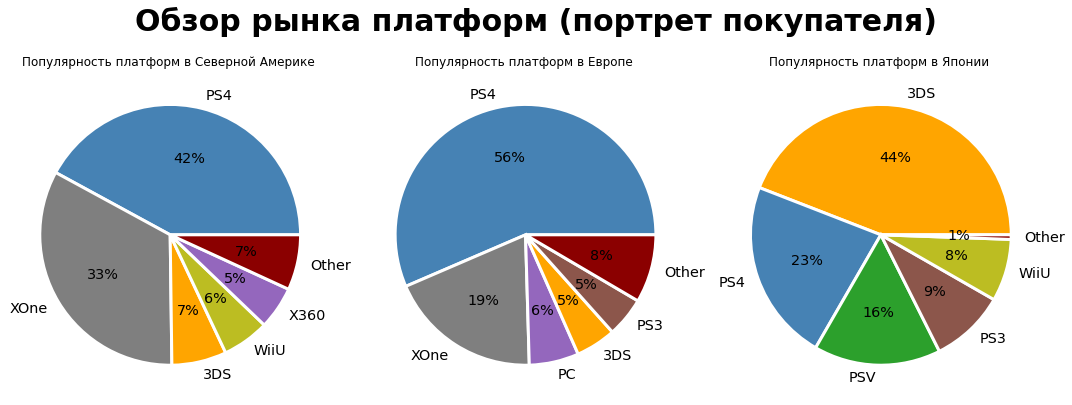        
        

__Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе__


### Проверка гипотез

Первая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

1. Нулевая гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC равны.
2. Альтернативная гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Вторая - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

1. Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports равны.
2. Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports различаются.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Гипотезы сформулированы верно

In [43]:
alpha = 0.05

xbox_one_ratings = data_actual[data_actual['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = data_actual[data_actual['platform'] == 'PC']['user_score'].dropna()

results = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны')


p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Важно удалить пропуски и «заглушки» перед проведением теста, молодец

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Стоит выравнивать периоды использования платформ, одна из приставок вышла на рынок совсем недавно ...

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Что означает на языке статистики p-значение: 0.11601398086668832
        
        p-значение: 3.442937492775816e-06

<div class="alert alert-info">
<font size="4", color = "black"><b>✍️ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Полученное значение p-value говорит о том, хотя существует разница в пользовательском рейтинге платформ Xbox One и PC различаются, с вероятностью в 11.6% такое или большее различие можно получить случайно. Такая вероятность слишком велика, чтобы говорить о значимой разнице между пользователскими оценками

<div class="alert alert-info">
<font size="4", color = "black"><b>✍️ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 1. Добавил, описание p-значения на языке статистики

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
можно подправить некоторые моменты
        
        После изменения актуального периода 1 гипотеза подтвердилась! 

<b>Из теории на тренажере</b>
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
        
https://allatambov.github.io/psms/pdf/hypo-test.pdf


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Приведу пример и теорию для понимания формулировок и интерпретации итогов проведения гипотез</b>
        
      
Задача. Приведены два датасета: сумма покупок, совершённых за месяц посетителями, привлечёнными по двум разным каналам. В вашем распоряжении случайная выборка из 30 покупок для каждого канала.
        
H0 - средние чеки равны
        
        
H1 - средние чеки НЕ равны

Да сама формулировка нулевой и альтернативной гипотезы звучит именно так, но результат теста интерпретируется другими словами
        

<b>Из теории на тренажере</b>
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
    
P-значение (англ. P-value) — величина, используемая при тестировании статистических гипотез. <b>Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода)</b> пример ниже

In [44]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = stats.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Интерпретация результата:

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, <b>с вероятностью в почти 19% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
        
А если p-value  будет равно 0,9999, то это значит, что с вероятностью почти 100% <u>такое различие</u> можно получить случайно — то есть почти никогда :)  (но учитываем, что тест проводится на выборке из генеральной совокупности, все может поменяться)


In [45]:
alpha = 0.05
action_ratings = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
sports_ratings = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()

results = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются


Выводы:
1. Средние пользовательские рейтинги платформ Xbox One и PC равны
2. Средние пользовательские рейтинги жанров Action и Sports также различаются.

### Общий вывод

1. Самая неуспешная платформа по продажам - PSV. Продажи на ней не только невысока, но также снижается с годами.
2. Успешными можно считать - PS4, XOne, 3DS игры на данные платформы буду популярны и в 2017 году
3. X360 и PS3 уже исполнилось 11 лет и они с малой вероятностью станут перспективными в 2017 году
4. Также стоит отметить PC, прибыль с которого невелика, но постоянно уже долгий промежуток времени
5. Большинство платформ имеют много выбросов, т.е. игры, которые продавались в гораздо большем количестве, чем большинство остальных игр на этой платформе.
6. У многих платформ есть большие выборсы, это связанно с существованием игр-хитов
7. Для платформы WiiU пользователи отдают предпочтение отзывам пользователей
8. Для платформ: Wii, 3DS, X360, PS3 пользователи больше прислушиваются к отзывам критиков, но и отзывы пользователей также влияют на объём продаж
9. Для PC,PSV, XOne:
    1. Отзывы пользователей почти не влияют на продажи, это заметно из графика - для игр, продажи которых невелики пользователи 
        могут ставить много положительных оценок, также это подтвержадется корреляцией - "-0.03" что говорит об отсутвии зависимости отзыва пользователя и объёма продаж.
    2. Отзывы критиков сильно влияют на продажи, это заметно из графика - чем больше оценка критика, тем больше объём продаж, 
        также это подтверждается корреляцией - 0.4
10. Самыми популярными жанрами являются Action, Sports, Misc, Shooter, Role-Playing, а в следствии и самымими прибыльными жанрами
11. Хоть и общий объём продаж высок, для каждого жанра, но в среднем медиана продаж находится в районе 0.2 млн  
12. У жанров: Action, Misc, Platform, Racing-Role, Sports - есть ярко выраженные выбросы - игры-хиты
13. Прибыльные жанры:
    1. Action       c   899.30 млн продаж и количеством игр - 613
    2. Shooter      c   697.48 млн продаж и количеством игр - 128
    3. Sports       c   664.15 млн продаж и количеством игр - 160
    4. Misc         c   398.45 млн продаж и количеством игр - 111
    5. Role-Playing c   344.78 млн продаж и количеством игр - 221
    6. Racing       c   246.53 млн продаж и количеством игр - 69
14. Из чего можно сделать выводы, что количество игр - не всегда значит, что жанр прибыльный, корреляция - 0.892126
15. Ярко выраженные неприбыльные жанры:
    1. Simulation   с    13.13 млн продаж и количеством игр - 44
    2. Strategy     с    3.96 млн продаж и количеством игр - 37
    3. Puzzle       с    2.21 млн продаж и количеством игр - 14
16. В NA и EU популярность новых платформ (PS4 и XOne) выше, чем в JP.
17. Для JP самая популярная платформа - 3DS, с большим отрывом относительно новых платформ
18. Жанр Action является самым популярным в NA и EU, в то время как в JP на первом месте - Role-Playing.
19. В NA и EU влияние рейтинга ESRB на продажи более заметно, чем в JP, где преобладают игры без рейтинга

Портреты пользователей:

    1. NA
    
    Самые популярные платформы: PS4 - 34.7%, XOne - 28.6%, X360 - 10.0%, 3DS - 8.0%, PS3 - 7,8% Other - 11.0%
    
    Самые популярные жанры: Shooter - 27.8%, Action - 25.5%, Sports - 16.2%, Role-Playing - 11.8%, Misc - 5.3%. Other - 13.3%
    
    Самый популярный рейтинг ESRB: M (для взрослых).

    2. EU
    
    Самые популярные платформы: PS4 - 48.0%, XOne - 17.1%, PS3 - 9.4%, PC - 6.6%, 3DS - 6.0% Other - 12.8%
    
    Самые популярные жанры: Action - 27.6%, Shooter - 24.2%, Sports - 16.9%, Role-Playing - 10.4%, Racing - 5.2%. Other - 15.7%
    
    Самый популярный рейтинг ESRB: M (для взрослых) и E (для всех).

    3. JP
    
    Самые популярные платформы: 3DS - 47.7%, PS4 - 16.2%, PSV - 15.7%, PS3 - 12.1%, WiiU - 7.9% Other - 0.4%
    
    Самые популярные жанры: Role-Playing - 40.3%, Action - 31.7%, Fighting - 6.9%, Misc - 6.0%, Shooter - 5.3%. Other - 16.6%
    
    Самый популярный рейтинг ESRB: RP (для всех).
    
22. Средние пользовательские рейтинги платформ Xbox One и PC равны.
23. Средние пользовательские рейтинги жанров Action и Sports также различаются.   

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод технически составлен грамотно
        
стоит перепроверить результаты после определения актуального периода и исправления всех комментариев 
        
       в2 - Успешными можно считать - PS4, XOne, 3DS, PS3, X360 игры на данные платформы буду популярны и в 2017 году

<div class="alert alert-info">
<font size="4", color = "black"><b>✍️ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Поправил вывод об успешных платформах

<div class="alert alert-info">
<font size="4", color = "black"><b>✍️ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Подправил выводы

<div class="alert alert-success">
<font size="5", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Ты выполнил практически все пункты проекта, молодец! Проведен значительный объем исследования 
        
Критические ❌ комментарии связаны с неточностями: 

 + добавить название
 + обработать пропуски и сократить категории в рейтингах ESRB — на твое усмотрение
 + переопределить актуальный период
 + дополнить перечень перспективных платформ
 + перестроить графики в ТОП-5
 + в разделе проверки гипотез подправить выборки плюс можно более подробно расшифровать значение p_value 
 + перепроверить промежуточные и итоговый выводы после всех исправлений

Стоит обратить внимание на ⚠️ комментарии...        
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5", color= "seagreen"><b>Жду твой проект и твои комментарии 🤝</b></font><br />

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Может пригодиться  
    
[Подборка статей о работе с библиотеками для анализа данных на языке Python](https://dfedorov.spb.ru/pandas/)
    
   
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)


[Искусство статистики](https://www.mann-ivanov-ferber.ru/books/iskusstvo-statistiki/)
        
[Постер «Графики, которые убеждают всех»](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)        
        
        
В помощь — как реализовать интерактивный план проекта вручную (для собственных проектов), смотри по <a href="https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704">ссылке</a>
    
пара ссылок и по разделам проекта можно будет переходить без пролистывания всего кода, особенно актуально на проектах длина которых >  10 страниц (и там где не установлен плагин TOC)      

### Бонус

In [46]:
data_games = pd.read_csv('/datasets/games.csv')

In [47]:
data_games.columns = map(str.lower, data_games.columns)

In [48]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [49]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [50]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [51]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [52]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

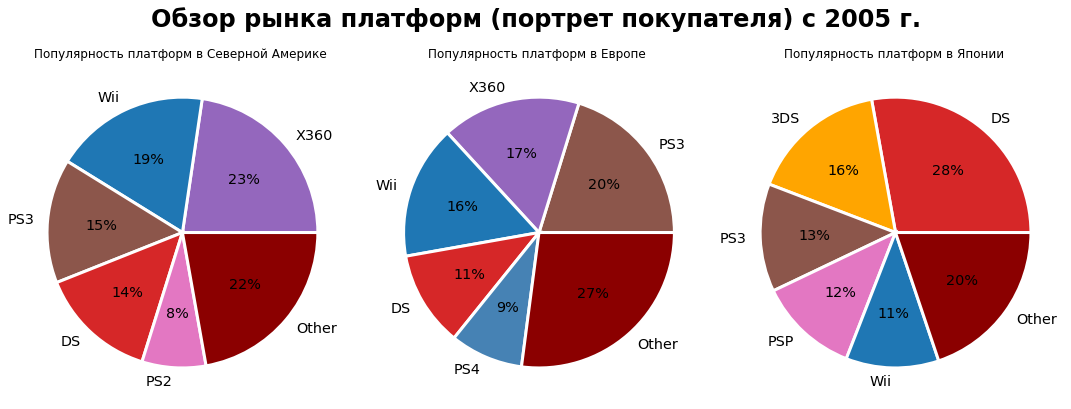

In [53]:
# check
# круги в ряд

x_year = 2005

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

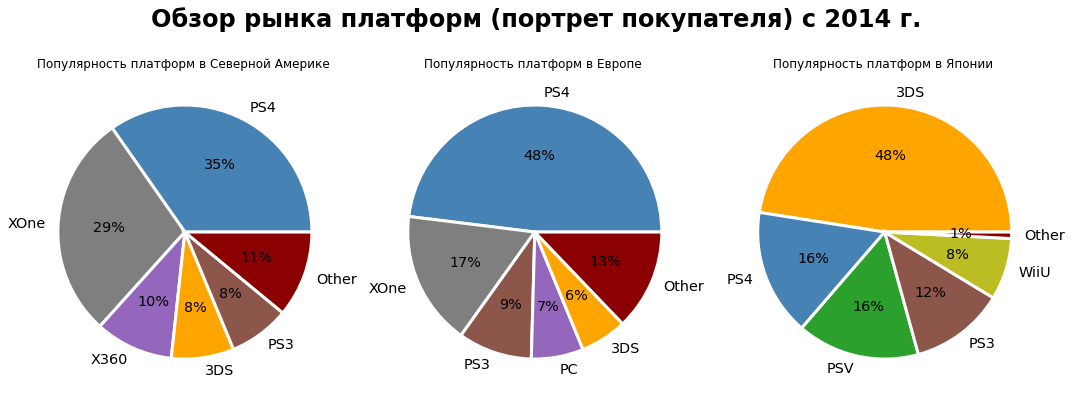

In [54]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ

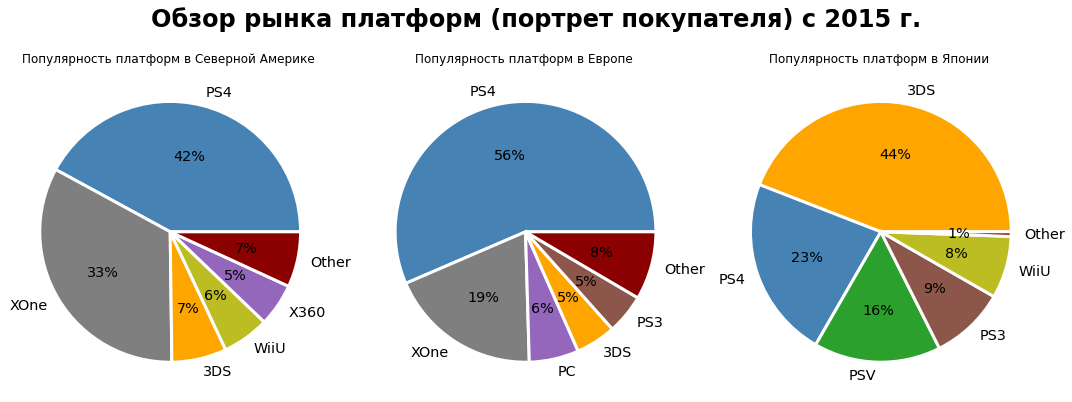

In [55]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])